## 1. Загрузка данных

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 12, 7

In [6]:
import zipfile

In [7]:
print('Extracting ZIP.')
with zipfile.ZipFile('Data\mpp.zip', 'r') as archive:# Extract to current directory
    archive.extractall('.')
print('ZIP Extracted.')

Extracting ZIP.
ZIP Extracted.


In [8]:
model_df = pd.read_csv('Data/model.csv')
model_df.head()

,incident,PD
0,14511110,0.022191
1,15018800,0.019972
2,14499737,0.043884
3,14953427,0.013412
4,14744453,0.033354


In [92]:
model_df[model_df['PD'].isna()]

,incident,PD
81617,21000721,NaN
81618,20969929,NaN
81619,20970028,NaN
81620,21001976,NaN
81621,21003292,NaN
...,...,...
82612,20559842,NaN
82613,20380255,NaN
82614,20348581,NaN
82615,21118162,NaN


In [27]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82617 entries, 0 to 82616
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   incident  82617 non-null  int64  
 1   PD        81617 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.3 MB


[Optimized ways to Read Large CSVs in Python](https://medium.com/analytics-vidhya/optimized-ways-to-read-large-csvs-in-python-ab2b36a7914e)

In [11]:
pd.__version__

'1.3.0'

In [20]:
%%time
filename = 'Data/data.csv'
chunksize = 10000

with pd.read_csv(filename, chunksize=chunksize) as reader:
    for chunk in reader:
        print(chunk.shape)

(10000, 1910)
(10000, 1910)
(10000, 1910)
(10000, 1910)
(10000, 1910)
(10000, 1910)
(10000, 1910)
(10000, 1910)
(2617, 1910)
Wall time: 34.6 s


In [14]:
%%time
data_chunk = pd.read_csv(filename, chunksize=chunksize)

Wall time: 80.1 ms


In [21]:
%%time
dfs = []
with pd.read_csv(filename, chunksize=chunksize) as reader:
    for chunk in reader:
        dfs.append(chunk)

Wall time: 39.7 s


In [23]:
%%time
df = pd.concat(dfs)

Wall time: 21.4 s


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82617 entries, 0 to 82616
Columns: 1910 entries, incident to Feature_1887
dtypes: float64(1837), int64(72), object(1)
memory usage: 1.2+ GB


## 2. Анализ данных

### Пропуски в данных

In [164]:
df.head()

,incident,flg_90_12_add,APPLICATION_MONTH,Category_Feature_0,Category_Feature_1,Category_Feature_2,Category_Feature_3,Category_Feature_4,Category_Feature_5,Category_Feature_6,...,Feature_1878,Feature_1879,Feature_1880,Feature_1881,Feature_1882,Feature_1883,Feature_1884,Feature_1885,Feature_1886,Feature_1887
0,14511110,0.0,2018-10,6.0,2,25,2.0,0.0,3,1,...,NaN,NaN,NaN,NaN,NaN,0,0,0,1,20184
1,15018800,0.0,2018-12,1.0,2,49,4.0,0.0,3,1,...,0.14384,0.259385,0.547065,0.28768,0.28768,0,1,1,1,20184
2,14499737,0.0,2018-10,6.0,2,24,1.0,0.0,3,0,...,NaN,0.420321,0.242687,NaN,NaN,0,1,0,1,20184
3,14953427,0.0,2018-12,4.0,2,26,1.0,0.0,3,1,...,NaN,NaN,NaN,NaN,NaN,0,1,1,1,20184
4,14744453,0.0,2018-11,6.0,2,30,4.0,2.0,3,1,...,NaN,0.045863,NaN,NaN,NaN,0,1,0,1,20184


<AxesSubplot:>

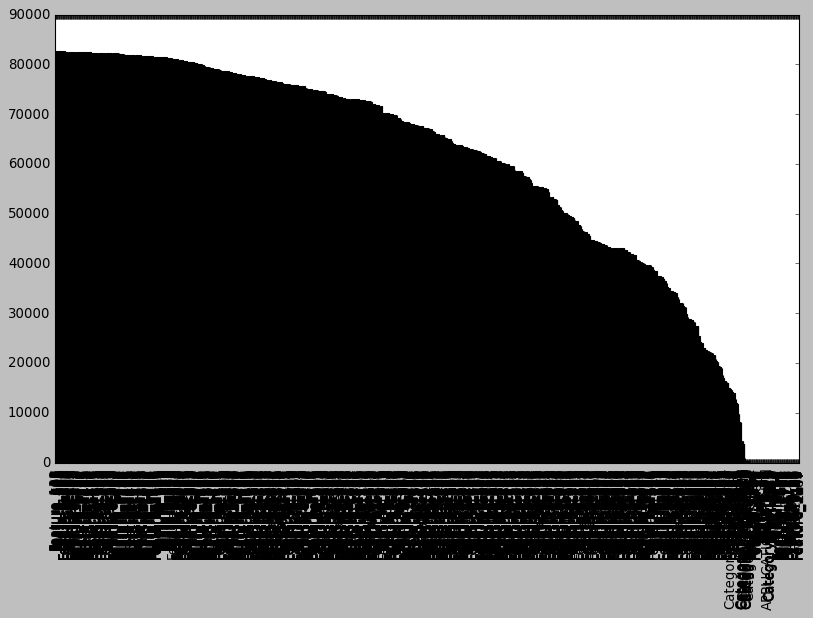

In [165]:
df.isna().sum().sort_values(ascending=False).plot(kind='bar')

Интересное распределение Nan в фичах

In [166]:
s = df.isna().sum().sort_values(ascending=False)
s

Feature_133     82607
Feature_101     82606
Feature_117     82606
Feature_707     82606
Feature_691     82606
                ...  
Feature_1744        0
Feature_1745        0
Feature_1746        0
Feature_1747        0
Feature_1887        0
Length: 1910, dtype: int64

### Удаление пропусков

Оставим фичи с Nan где их не более 10000. Остальные удалим

In [168]:
n = 10000
print(f'Процент пропусков с допустимым порогом NaN ({n}): {(n / df.shape[0]*100):.1f}%')

Процент пропусков с допустимым порогом NaN (10000): 12.1%


In [169]:
s_1 = s[s > 10000]
s_1

Feature_133     82607
Feature_101     82606
Feature_117     82606
Feature_707     82606
Feature_691     82606
                ...  
Feature_1041    11919
Feature_1082    11919
Feature_1000    11919
Feature_69      11682
Feature_921     10544
Length: 1754, dtype: int64

In [255]:
df2 = df.drop(s_1.index, axis=1)
df2

,incident,flg_90_12_add,APPLICATION_MONTH,Category_Feature_0,Category_Feature_1,Category_Feature_2,Category_Feature_3,Category_Feature_4,Category_Feature_5,Category_Feature_6,...,Feature_1787,Feature_1788,Feature_1789,Feature_1839,Feature_1860,Feature_1883,Feature_1884,Feature_1885,Feature_1886,Feature_1887
0,14511110,0.0,2018-10,6.0,2,25,2.0,0.0,3,1,...,0.000000,0.000,0.0,0.500000,0,0,0,0,1,20184
1,15018800,0.0,2018-12,1.0,2,49,4.0,0.0,3,1,...,0.000000,0.000,0.0,0.875000,0,0,1,1,1,20184
2,14499737,0.0,2018-10,6.0,2,24,1.0,0.0,3,0,...,0.055556,0.000,0.0,0.866667,0,0,1,0,1,20184
3,14953427,0.0,2018-12,4.0,2,26,1.0,0.0,3,1,...,0.000000,0.000,0.0,1.000000,1,0,1,1,1,20184
4,14744453,0.0,2018-11,6.0,2,30,4.0,2.0,3,1,...,0.125000,0.125,0.0,0.571429,0,0,1,0,1,20184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82612,20559842,NaN,2020-01,1.0,2,34,2.0,2.0,3,0,...,0.043478,0.000,0.0,0.909091,0,0,0,0,1,20201
82613,20380255,NaN,2020-01,10.0,2,66,2.0,0.0,5,1,...,0.000000,0.000,0.0,0.714286,0,0,0,0,0,20201
82614,20348581,NaN,2020-01,4.0,1,32,1.0,0.0,3,0,...,0.000000,0.000,0.0,1.000000,0,0,1,1,1,20201
82615,21118162,NaN,2020-02,5.0,2,62,5.0,0.0,6,1,...,0.000000,0.000,0.0,1.000000,0,0,0,0,0,20201


In [200]:
s2 = df2.isna().sum().sort_values(ascending=False)
s2[s2 != 0]

Feature_673            9715
Feature_672            9715
Feature_674            9715
Feature_1085           8060
Feature_1044           8060
Feature_1003           8060
Feature_962            8060
Feature_71             7879
Category_Feature_18    4307
Category_Feature_13    4307
Category_Feature_14    4307
Category_Feature_15    4307
Category_Feature_16    4307
Category_Feature_4     3809
Category_Feature_3     3809
Feature_1839           3800
flg_90_12_add          1000
Feature_0               426
Feature_1               426
Feature_4               284
Feature_3               284
Category_Feature_12     284
Category_Feature_11     284
Category_Feature_10     284
Category_Feature_9      284
Category_Feature_8      284
Category_Feature_7      284
Feature_2               150
Category_Feature_0       22
dtype: int64

### Заменим пропуски в данных 

In [201]:
columns_NaN = s2[s2 != 0].index
columns_NaN

Index(['Feature_673', 'Feature_672', 'Feature_674', 'Feature_1085',
       'Feature_1044', 'Feature_1003', 'Feature_962', 'Feature_71',
       'Category_Feature_18', 'Category_Feature_13', 'Category_Feature_14',
       'Category_Feature_15', 'Category_Feature_16', 'Category_Feature_4',
       'Category_Feature_3', 'Feature_1839', 'flg_90_12_add', 'Feature_0',
       'Feature_1', 'Feature_4', 'Feature_3', 'Category_Feature_12',
       'Category_Feature_11', 'Category_Feature_10', 'Category_Feature_9',
       'Category_Feature_8', 'Category_Feature_7', 'Feature_2',
       'Category_Feature_0'],
      dtype='object')

In [202]:
columns_fill = list(set(columns_NaN) - set(['flg_90_12_add']))
columns_fill

['Feature_3',
 'Category_Feature_14',
 'Category_Feature_12',
 'Feature_71',
 'Category_Feature_0',
 'Feature_2',
 'Feature_0',
 'Category_Feature_15',
 'Feature_1839',
 'Category_Feature_8',
 'Category_Feature_16',
 'Category_Feature_3',
 'Category_Feature_13',
 'Feature_1085',
 'Category_Feature_9',
 'Feature_1044',
 'Feature_674',
 'Category_Feature_11',
 'Feature_1003',
 'Feature_962',
 'Category_Feature_7',
 'Feature_672',
 'Feature_1',
 'Category_Feature_10',
 'Category_Feature_18',
 'Category_Feature_4',
 'Feature_673',
 'Feature_4']

In [203]:
df3 = df2[columns_fill]
medians = df3.median()
df3 = df3.fillna(medians)

In [204]:
df2[columns_fill] = df3

In [205]:
df2

,incident,flg_90_12_add,APPLICATION_MONTH,Category_Feature_0,Category_Feature_1,Category_Feature_2,Category_Feature_3,Category_Feature_4,Category_Feature_5,Category_Feature_6,...,Feature_1787,Feature_1788,Feature_1789,Feature_1839,Feature_1860,Feature_1883,Feature_1884,Feature_1885,Feature_1886,Feature_1887
0,14511110,0.0,2018-10,6.0,2,25,2.0,0.0,3,1,...,0.000000,0.000,0.0,0.500000,0,0,0,0,1,20184
1,15018800,0.0,2018-12,1.0,2,49,4.0,0.0,3,1,...,0.000000,0.000,0.0,0.875000,0,0,1,1,1,20184
2,14499737,0.0,2018-10,6.0,2,24,1.0,0.0,3,0,...,0.055556,0.000,0.0,0.866667,0,0,1,0,1,20184
3,14953427,0.0,2018-12,4.0,2,26,1.0,0.0,3,1,...,0.000000,0.000,0.0,1.000000,1,0,1,1,1,20184
4,14744453,0.0,2018-11,6.0,2,30,4.0,2.0,3,1,...,0.125000,0.125,0.0,0.571429,0,0,1,0,1,20184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82612,20559842,NaN,2020-01,1.0,2,34,2.0,2.0,3,0,...,0.043478,0.000,0.0,0.909091,0,0,0,0,1,20201
82613,20380255,NaN,2020-01,10.0,2,66,2.0,0.0,5,1,...,0.000000,0.000,0.0,0.714286,0,0,0,0,0,20201
82614,20348581,NaN,2020-01,4.0,1,32,1.0,0.0,3,0,...,0.000000,0.000,0.0,1.000000,0,0,1,1,1,20201
82615,21118162,NaN,2020-02,5.0,2,62,5.0,0.0,6,1,...,0.000000,0.000,0.0,1.000000,0,0,0,0,0,20201


### Соединим обучающие датасеты 

In [221]:
general_df = df2.merge(model_df)
general_df

,incident,flg_90_12_add,APPLICATION_MONTH,Category_Feature_0,Category_Feature_1,Category_Feature_2,Category_Feature_3,Category_Feature_4,Category_Feature_5,Category_Feature_6,...,Feature_1788,Feature_1789,Feature_1839,Feature_1860,Feature_1883,Feature_1884,Feature_1885,Feature_1886,Feature_1887,PD
0,14511110,0.0,2018-10,6.0,2,25,2.0,0.0,3,1,...,0.000,0.0,0.500000,0,0,0,0,1,20184,0.022191
1,15018800,0.0,2018-12,1.0,2,49,4.0,0.0,3,1,...,0.000,0.0,0.875000,0,0,1,1,1,20184,0.019972
2,14499737,0.0,2018-10,6.0,2,24,1.0,0.0,3,0,...,0.000,0.0,0.866667,0,0,1,0,1,20184,0.043884
3,14953427,0.0,2018-12,4.0,2,26,1.0,0.0,3,1,...,0.000,0.0,1.000000,1,0,1,1,1,20184,0.013412
4,14744453,0.0,2018-11,6.0,2,30,4.0,2.0,3,1,...,0.125,0.0,0.571429,0,0,1,0,1,20184,0.033354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82612,20559842,NaN,2020-01,1.0,2,34,2.0,2.0,3,0,...,0.000,0.0,0.909091,0,0,0,0,1,20201,NaN
82613,20380255,NaN,2020-01,10.0,2,66,2.0,0.0,5,1,...,0.000,0.0,0.714286,0,0,0,0,0,20201,NaN
82614,20348581,NaN,2020-01,4.0,1,32,1.0,0.0,3,0,...,0.000,0.0,1.000000,0,0,1,1,1,20201,NaN
82615,21118162,NaN,2020-02,5.0,2,62,5.0,0.0,6,1,...,0.000,0.0,1.000000,0,0,0,0,0,20201,NaN


### Создадим целевую фичу

In [222]:
general_df['target'] = (general_df['flg_90_12_add'] - general_df['PD']).abs()

### Сформируем фичи года и месяца

In [223]:
general_df['APPLICATION_MONTH']

0        2018-10
1        2018-12
2        2018-10
3        2018-12
4        2018-11
          ...   
82612    2020-01
82613    2020-01
82614    2020-01
82615    2020-02
82616    2020-03
Name: APPLICATION_MONTH, Length: 82617, dtype: object

In [224]:
general_df['year'] = general_df['APPLICATION_MONTH'].apply(lambda x: x.split('-')[0])
general_df['year'] = pd.factorize(general_df['year'])[0]

In [225]:
general_df['month'] = general_df['APPLICATION_MONTH'].apply(lambda x: x.split('-')[1])
general_df['month'] = pd.factorize(general_df['month'])[0]
general_df

,incident,flg_90_12_add,APPLICATION_MONTH,Category_Feature_0,Category_Feature_1,Category_Feature_2,Category_Feature_3,Category_Feature_4,Category_Feature_5,Category_Feature_6,...,Feature_1860,Feature_1883,Feature_1884,Feature_1885,Feature_1886,Feature_1887,PD,target,year,month
0,14511110,0.0,2018-10,6.0,2,25,2.0,0.0,3,1,...,0,0,0,0,1,20184,0.022191,0.022191,0,0
1,15018800,0.0,2018-12,1.0,2,49,4.0,0.0,3,1,...,0,0,1,1,1,20184,0.019972,0.019972,0,1
2,14499737,0.0,2018-10,6.0,2,24,1.0,0.0,3,0,...,0,0,1,0,1,20184,0.043884,0.043884,0,0
3,14953427,0.0,2018-12,4.0,2,26,1.0,0.0,3,1,...,1,0,1,1,1,20184,0.013412,0.013412,0,1
4,14744453,0.0,2018-11,6.0,2,30,4.0,2.0,3,1,...,0,0,1,0,1,20184,0.033354,0.033354,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82612,20559842,NaN,2020-01,1.0,2,34,2.0,2.0,3,0,...,0,0,0,0,1,20201,NaN,NaN,2,3
82613,20380255,NaN,2020-01,10.0,2,66,2.0,0.0,5,1,...,0,0,0,0,0,20201,NaN,NaN,2,3
82614,20348581,NaN,2020-01,4.0,1,32,1.0,0.0,3,0,...,0,0,1,1,1,20201,NaN,NaN,2,3
82615,21118162,NaN,2020-02,5.0,2,62,5.0,0.0,6,1,...,0,0,0,0,0,20201,NaN,NaN,2,5


In [226]:
general_df = general_df.drop(['APPLICATION_MONTH'], axis=1)

In [228]:
general_df.shape[0]

82617

In [229]:
len(general_df['incident'].unique())

82617

In [232]:
general_df.set_index('incident', inplace=True)

### Сформируем обучающие и предсказателбные датасеты

In [238]:
train = general_df[~general_df['PD'].isna()]
train

,flg_90_12_add,Category_Feature_0,Category_Feature_1,Category_Feature_2,Category_Feature_3,Category_Feature_4,Category_Feature_5,Category_Feature_6,Category_Feature_7,Category_Feature_8,...,Feature_1860,Feature_1883,Feature_1884,Feature_1885,Feature_1886,Feature_1887,PD,target,year,month
incident,,,,,,,,,,,,,,,,,,,,,
14511110,0.0,6.0,2,25,2.0,0.0,3,1,2.0,35000.0000,...,0,0,0,0,1,20184,0.022191,0.022191,0,0
15018800,0.0,1.0,2,49,4.0,0.0,3,1,2.0,50000.0000,...,0,0,1,1,1,20184,0.019972,0.019972,0,1
14499737,0.0,6.0,2,24,1.0,0.0,3,0,1.0,20000.0000,...,0,0,1,0,1,20184,0.043884,0.043884,0,0
14953427,0.0,4.0,2,26,1.0,0.0,3,1,2.0,30000.0000,...,1,0,1,1,1,20184,0.013412,0.013412,0,1
14744453,0.0,6.0,2,30,4.0,2.0,3,1,3.0,50000.0000,...,0,0,1,0,1,20184,0.033354,0.033354,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20998757,0.0,1.0,2,56,2.0,0.0,3,0,4.0,66000.0000,...,0,0,0,1,1,20201,0.037867,0.037867,2,5
20999207,0.0,4.0,2,29,2.0,1.0,5,0,2.0,0.0000,...,0,0,0,1,0,20201,0.014266,0.014266,2,5
20999293,0.0,1.0,1,54,2.0,1.0,6,0,3.0,128615.0000,...,0,0,0,1,0,20201,0.103010,0.103010,2,5


In [240]:
train = train.drop(['flg_90_12_add', 'PD'], axis=1)

In [245]:
train.isna().sum().sort_values(ascending=False)

Category_Feature_0    0
Feature_1751          0
Feature_1744          0
Feature_1745          0
Feature_1746          0
                     ..
Feature_34            0
Feature_35            0
Feature_36            0
Feature_37            0
month                 0
Length: 156, dtype: int64

In [256]:
train['Feature_1887'].nunique()

6

In [234]:
df_predict = general_df[general_df['PD'].isna()]
df_predict

,flg_90_12_add,Category_Feature_0,Category_Feature_1,Category_Feature_2,Category_Feature_3,Category_Feature_4,Category_Feature_5,Category_Feature_6,Category_Feature_7,Category_Feature_8,...,Feature_1860,Feature_1883,Feature_1884,Feature_1885,Feature_1886,Feature_1887,PD,target,year,month
incident,,,,,,,,,,,,,,,,,,,,,
21000721,NaN,14.0,2,54,2.0,0.0,6,1,3.0,26168.7619,...,0,0,0,0,0,20201,NaN,NaN,2,5
20969929,NaN,3.0,1,32,2.0,1.0,3,1,3.0,30000.0000,...,0,0,0,1,1,20201,NaN,NaN,2,5
20970028,NaN,4.0,1,41,2.0,1.0,3,0,2.0,42000.0000,...,0,0,0,0,1,20201,NaN,NaN,2,5
21001976,NaN,15.0,1,29,1.0,0.0,6,1,1.0,23000.0000,...,1,0,1,0,0,20201,NaN,NaN,2,5
21003292,NaN,1.0,2,36,2.0,1.0,5,0,3.0,32000.0000,...,0,0,0,1,0,20201,NaN,NaN,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20559842,NaN,1.0,2,34,2.0,2.0,3,0,2.0,35000.0000,...,0,0,0,0,1,20201,NaN,NaN,2,3
20380255,NaN,10.0,2,66,2.0,0.0,5,1,3.0,19000.0000,...,0,0,0,0,0,20201,NaN,NaN,2,3
20348581,NaN,4.0,1,32,1.0,0.0,3,0,1.0,0.0000,...,0,0,1,1,1,20201,NaN,NaN,2,3


In [241]:
df_predict = df_predict.drop(['flg_90_12_add', 'PD'], axis=1)

In [243]:
X = train.drop('target', axis=1)
y = train.target

In [257]:
X

,Category_Feature_0,Category_Feature_1,Category_Feature_2,Category_Feature_3,Category_Feature_4,Category_Feature_5,Category_Feature_6,Category_Feature_7,Category_Feature_8,Category_Feature_9,...,Feature_1789,Feature_1839,Feature_1860,Feature_1883,Feature_1884,Feature_1885,Feature_1886,Feature_1887,year,month
incident,,,,,,,,,,,,,,,,,,,,,
14511110,6.0,2,25,2.0,0.0,3,1,2.0,35000.0000,0.0,...,0.0,0.500000,0,0,0,0,1,20184,0,0
15018800,1.0,2,49,4.0,0.0,3,1,2.0,50000.0000,0.0,...,0.0,0.875000,0,0,1,1,1,20184,0,1
14499737,6.0,2,24,1.0,0.0,3,0,1.0,20000.0000,0.0,...,0.0,0.866667,0,0,1,0,1,20184,0,0
14953427,4.0,2,26,1.0,0.0,3,1,2.0,30000.0000,0.0,...,0.0,1.000000,1,0,1,1,1,20184,0,1
14744453,6.0,2,30,4.0,2.0,3,1,3.0,50000.0000,0.0,...,0.0,0.571429,0,0,1,0,1,20184,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20998757,1.0,2,56,2.0,0.0,3,0,4.0,66000.0000,0.0,...,0.0,0.928571,0,0,0,1,1,20201,2,5
20999207,4.0,2,29,2.0,1.0,5,0,2.0,0.0000,0.0,...,0.0,0.785714,0,0,0,1,0,20201,2,5
20999293,1.0,1,54,2.0,1.0,6,0,3.0,128615.0000,0.0,...,0.0,0.833333,0,0,0,1,0,20201,2,5


<AxesSubplot:>

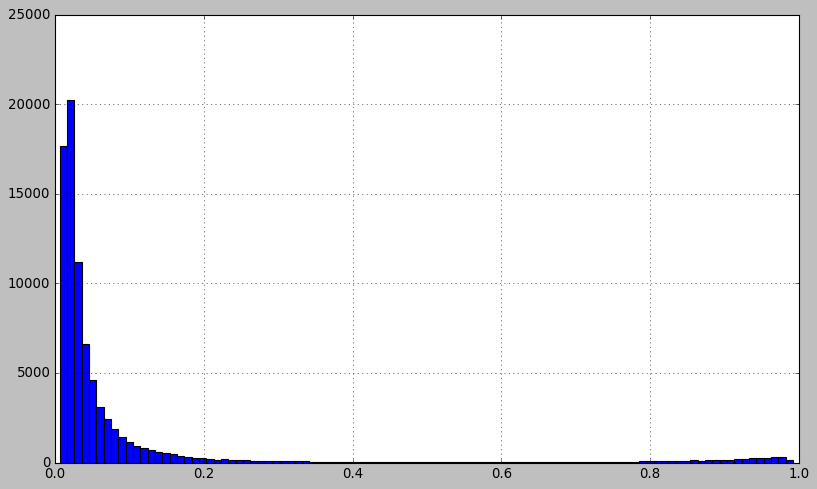

In [249]:
y.hist(bins=100)

### Предобработка

In [258]:
from sklearn.preprocessing import StandardScaler

In [264]:
num_columns = [col for col in X.columns if col.startswith('Feature')]
num_columns

['Feature_0',
 'Feature_1',
 'Feature_2',
 'Feature_3',
 'Feature_4',
 'Feature_5',
 'Feature_6',
 'Feature_7',
 'Feature_8',
 'Feature_9',
 'Feature_10',
 'Feature_11',
 'Feature_12',
 'Feature_13',
 'Feature_14',
 'Feature_15',
 'Feature_16',
 'Feature_17',
 'Feature_18',
 'Feature_19',
 'Feature_20',
 'Feature_21',
 'Feature_22',
 'Feature_23',
 'Feature_24',
 'Feature_25',
 'Feature_26',
 'Feature_27',
 'Feature_28',
 'Feature_29',
 'Feature_30',
 'Feature_31',
 'Feature_32',
 'Feature_33',
 'Feature_34',
 'Feature_35',
 'Feature_36',
 'Feature_37',
 'Feature_38',
 'Feature_39',
 'Feature_40',
 'Feature_41',
 'Feature_42',
 'Feature_43',
 'Feature_44',
 'Feature_45',
 'Feature_46',
 'Feature_47',
 'Feature_48',
 'Feature_49',
 'Feature_50',
 'Feature_51',
 'Feature_52',
 'Feature_53',
 'Feature_54',
 'Feature_58',
 'Feature_59',
 'Feature_60',
 'Feature_61',
 'Feature_62',
 'Feature_63',
 'Feature_64',
 'Feature_65',
 'Feature_66',
 'Feature_67',
 'Feature_68',
 'Feature_71',
 'Fea

In [261]:
scaler = StandardScaler()
X[num_columns] = scaler.fit_transform(X[num_columns])

In [266]:
cat_columns = [col for col in X.columns if col.startswith('Category')]
cat_columns

['Category_Feature_0',
 'Category_Feature_1',
 'Category_Feature_2',
 'Category_Feature_3',
 'Category_Feature_4',
 'Category_Feature_5',
 'Category_Feature_6',
 'Category_Feature_7',
 'Category_Feature_8',
 'Category_Feature_9',
 'Category_Feature_10',
 'Category_Feature_11',
 'Category_Feature_12',
 'Category_Feature_13',
 'Category_Feature_14',
 'Category_Feature_15',
 'Category_Feature_16',
 'Category_Feature_18']

In [267]:
X[cat_columns]

,Category_Feature_0,Category_Feature_1,Category_Feature_2,Category_Feature_3,Category_Feature_4,Category_Feature_5,Category_Feature_6,Category_Feature_7,Category_Feature_8,Category_Feature_9,Category_Feature_10,Category_Feature_11,Category_Feature_12,Category_Feature_13,Category_Feature_14,Category_Feature_15,Category_Feature_16,Category_Feature_18
incident,,,,,,,,,,,,,,,,,,
14511110,6.0,2,25,2.0,0.0,3,1,2.0,35000.0000,0.0,0.0,1.0,0.0,2.0,7.0,4.0,28.0,3.0
15018800,1.0,2,49,4.0,0.0,3,1,2.0,50000.0000,0.0,0.0,0.0,0.0,2.0,7.0,5.0,23.0,4.0
14499737,6.0,2,24,1.0,0.0,3,0,1.0,20000.0000,0.0,0.0,0.0,0.0,2.0,7.0,5.0,13.0,5.0
14953427,4.0,2,26,1.0,0.0,3,1,2.0,30000.0000,0.0,0.0,0.0,0.0,2.0,7.0,1.0,32.0,4.0
14744453,6.0,2,30,4.0,2.0,3,1,3.0,50000.0000,0.0,0.0,1.0,0.0,2.0,7.0,5.0,22.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20998757,1.0,2,56,2.0,0.0,3,0,4.0,66000.0000,0.0,1.0,0.0,1.0,2.0,7.0,5.0,4.0,1.0
20999207,4.0,2,29,2.0,1.0,5,0,2.0,0.0000,0.0,0.0,0.0,0.0,2.0,8.0,4.0,22.0,4.0
20999293,1.0,1,54,2.0,1.0,6,0,3.0,128615.0000,0.0,0.0,0.0,0.0,2.0,3.0,5.0,22.0,5.0


In [268]:
X['Category_Feature_8'].nunique()

23963

In [273]:
from sklearn.preprocessing import MinMaxScaler

In [275]:
minmax = MinMaxScaler()
X['Category_Feature_8'] = minmax.fit_transform(X[['Category_Feature_8']])

In [276]:
X

,Category_Feature_0,Category_Feature_1,Category_Feature_2,Category_Feature_3,Category_Feature_4,Category_Feature_5,Category_Feature_6,Category_Feature_7,Category_Feature_8,Category_Feature_9,...,Feature_1789,Feature_1839,Feature_1860,Feature_1883,Feature_1884,Feature_1885,Feature_1886,Feature_1887,year,month
incident,,,,,,,,,,,,,,,,,,,,,
14511110,6.0,2,25,2.0,0.0,3,1,2.0,0.001269,0.0,...,-0.112125,-1.829385,-0.325041,-0.337364,-0.799948,-0.790096,0.975011,-2.176503,0,0
15018800,1.0,2,49,4.0,0.0,3,1,2.0,0.001813,0.0,...,-0.112125,0.227251,-0.325041,-0.337364,1.250082,1.265669,0.975011,-2.176503,0,1
14499737,6.0,2,24,1.0,0.0,3,0,1.0,0.000725,0.0,...,-0.112125,0.181548,-0.325041,-0.337364,1.250082,-0.790096,0.975011,-2.176503,0,0
14953427,4.0,2,26,1.0,0.0,3,1,2.0,0.001088,0.0,...,-0.112125,0.912796,3.076534,-0.337364,1.250082,1.265669,0.975011,-2.176503,0,1
14744453,6.0,2,30,4.0,2.0,3,1,3.0,0.001813,0.0,...,-0.112125,-1.437645,-0.325041,-0.337364,1.250082,-0.790096,0.975011,-2.176503,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20998757,1.0,2,56,2.0,0.0,3,0,4.0,0.002393,0.0,...,-0.112125,0.521056,-0.325041,-0.337364,-0.799948,1.265669,0.975011,1.890256,2,5
20999207,4.0,2,29,2.0,1.0,5,0,2.0,0.000000,0.0,...,-0.112125,-0.262424,-0.325041,-0.337364,-0.799948,1.265669,-1.025629,1.890256,2,5
20999293,1.0,1,54,2.0,1.0,6,0,3.0,0.004663,0.0,...,-0.112125,-0.001264,-0.325041,-0.337364,-0.799948,1.265669,-1.025629,1.890256,2,5


## Базовая модель

In [242]:
from sklearn.model_selection import train_test_split

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [270]:
from sklearn.linear_model import LinearRegression

In [271]:
from sklearn.metrics import mean_absolute_error

In [278]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
mean_absolute_error(y_test, pred_lr)

0.0851673521240844

In [253]:
from sklearn.ensemble import RandomForestRegressor

In [283]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
mean_absolute_error(y_test, pred_rf)

0.08981343298472791

In [279]:
import xgboost as xgb

In [284]:
xgbr = xgb.XGBRegressor() 
xgbr.fit(X_train, y_train)
pred_xgbr = xgbr.predict(X_test)
mean_absolute_error(y_test, pred_xgbr)

0.0843162332491332

In [282]:
from sklearn.svm import LinearSVR

In [285]:
svr = LinearSVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)
mean_absolute_error(y_test, pred_svr)

C:\Programs\Anaconda\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.13702442359422698

## ИТОГИ

Результат: 0.07822 (229 место)

Замечания:
+ Целевую переменную нужно было привести к нормальному распределению
+ Заполнять пропуски можно было ориентируясь на месяцы
+ Из моделей можно было попробовать Catboost